# <b>Wave simulation example</b>
---

## <b>Example description</b>

## <b>Python packages</b>

In [4]:
import numpy as np
import os
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams.update({'font.size':17}) # Use for all plots
from pathlib import Path
from Py_1DProfile_SWAN import generate_xp_zp

## <b>Input parameters</b>


Number of mesh is 910          
Total length of profile is 9078.0 m.



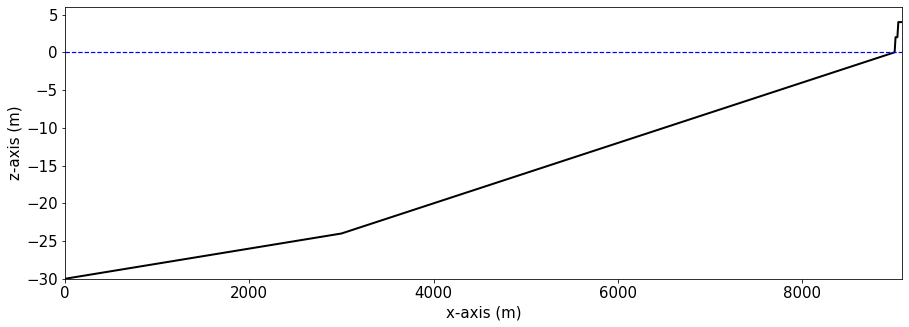

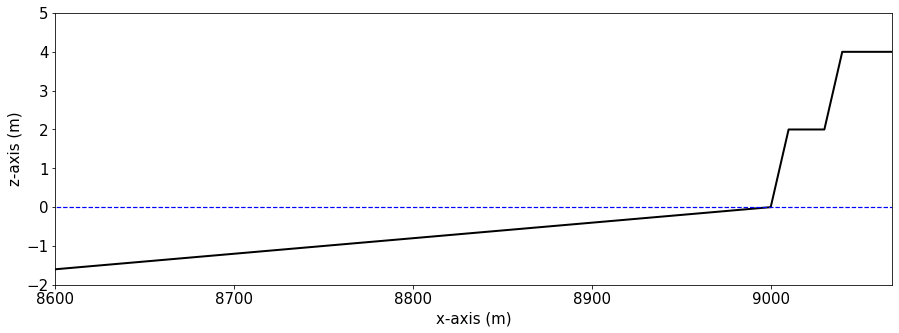

In [23]:
dx = 10
deep_water = 30
slope = 1/500, 1/250, 1/5, 0, 1/5, 0
length_profile = 3000, 6000, 5, 20, 3, 50
xp, zp, numb_mesh, total_length = generate_xp_zp(dx, deep_water, slope, length_profile)
# PLot profile (closer)
plt.figure(figsize=(15, 5))
plt.plot(xp, zp * -1, '-', color='black', linewidth=2)
plt.plot([0, total_length], [0, 0], '--', color='blue', linewidth=1.2)
plt.axis([8600, total_length-10, -zp[0]+28, -zp[-1] + 1])
plt.xlabel('x-axis (m)')
plt.ylabel('z-axis (m)')
plt.show()

## <b>Creat command lines</b>

In [38]:
# Define input for command lines
# case name and number
fcase_name = 'Exercise'
fcase_code = 'Ex'
fcase_numb = '0'
# wave characteristics
wperiod = 7
wheight = 2
wlevel = 2
wind_vel = 20
# define output file type
type_spectral = '.spec'
type_table = '.tab'
# define curve output (results along profile)
outp_curve_name = 'prof'
outp_curve_mesh = numb_mesh
outp_curve_length = total_length
extract_curve_name = fcase_code + fcase_numb + outp_curve_name + type_table
outp_char_1 = 'XP'
outp_char_2 = 'HSIG'
outp_char_3 = 'SETUP'
# define point output (results at a point in the profile)
outp_point_name_1 = 'p1'
outp_point_x1 = 10
outp_point_y1 = 0
extract_point_name_1 = fcase_code + fcase_numb + outp_point_name_1 + type_spectral

outp_point_name_2 = 'p2'
outp_point_x2 = 8900
outp_point_y2 = 0
extract_point_name_2 = fcase_code + fcase_numb + outp_point_name_2 + type_spectral

In [25]:
def create_command_swn():
    globals().update(locals())
    command_lines = f"$*************HEADING***********************************\
        \nPROJ '{fcase_name}' '{fcase_code}{fcase_numb}'\
        \n$ Project description: \
        \n$ Wave period = {wperiod}s, wave height = {wheight}m, MWL = {wlevel}m\
        \n$***********MODEL INPUT*********************************\
        \n$$$ Initial settings\
        \nMODE STAT ONED\
        \nSET {wlevel}\
        \nSET MAXERR = 2\
        \n$$$ Computational grid, boundary conditions\
        \nCGRID REG 0. 0. 0. {total_length:.0f} 0. {numb_mesh} 0 SEC -30. 30. 360 0.001 1. 100\
        \nINPGRID BOTTOM REG 0. 0. 0. {numb_mesh} 0 {dx} 0\
        \nREADINP BOTTOM 1. '{file_bottom_level}' 1 0 FREE\
        \n$$$ Inital and boundary conditions\
        \nBOUnd SHAPespec JONswap\
        \nBOU SIDE W CCW CON PAR {wheight} {wperiod} 0. 800.\
        \n$$$ Physics\
        \nWIND {wind_vel} 0.\
        \nOFF QUAD\
        \nTRIAD\
        \nBREAK\
        \nFRIC JONSWAP\
        \nSETUP\
        \n$************ OUTPUT REQUESTS *************************\
        \n$$$ Output locations\
        \nCURVE '{outp_curve_name}' 0. 0. {outp_curve_mesh} {outp_curve_length:.0f} 0. \
        \nPOINTS '{outp_point_name_1}' {outp_point_x1:.0f}. {outp_point_y1:.0f}.\
        \nPOINTS '{outp_point_name_2}' {outp_point_x2:.0f}. {outp_point_y2:.0f}.\
        \n$$$ Write output quantities\
        \nSPEC '{outp_point_name_1}' SPEC1D '{extract_point_name_1}'\
        \nSPEC '{outp_point_name_2}' SPEC1D '{extract_point_name_2}'\
        \nTABLE '{outp_curve_name}' NOHEAD '{extract_curve_name}' {outp_char_1} {outp_char_2} {outp_char_3}\
        \n$************ COMPUTATIONs *************************\
        \nTEST 1 0\
        \nCOMPUTE\
        \nSTOP"
    return command_lines

## <b>Save bottom level and command files</b>

In [8]:
# Before changing directory, users should create a folder to run the model
%cd swan_test

[WinError 2] The system cannot find the file specified: 'swan_test'
C:\Users\daoho\Downloads\Jupyter_notebooks\Tung_Notebooks\SWAN_Notebook\swan_test


In [39]:
# Save bottom level: User creates a folder name "swan_test"
file_bottom_level = f'{fcase_name}_{fcase_numb}.bot'
bottom_level = np.append(zp, zp[-1])
np.savetxt(file_bottom_level, np.round(bottom_level, 3), fmt='%10.3f')
print(f'The bottom level and command file have been saved as: {file_bottom_level} \
\nPlease find those files at local directory: /swan_test')

file_command_lines = f'{fcase_name}_{fcase_numb}.swn'
file_command_run = f'{fcase_name}_{fcase_numb}'
command_lines = create_command_swn()
with open (f"{file_command_lines}", "w") as command_file:
  command_file.write(command_lines)
  command_file.close()
print("\n", command_lines)

The bottom level and command file have been saved as: Exercise_0.bot 
Please find those files at local directory: /swan_test

 $*************HEADING***********************************        
PROJ 'Exercise' 'Ex0'        
$ Project description:         
$ Wave period = 7s, wave height = 2m, MWL = 2m        
$***********MODEL INPUT*********************************        
$$$ Initial settings        
MODE STAT ONED        
SET 2        
SET MAXERR = 2        
$$$ Computational grid, boundary conditions        
CGRID REG 0. 0. 0. 9078 0. 910 0 SEC -30. 30. 360 0.001 1. 100        
INPGRID BOTTOM REG 0. 0. 0. 910 0 10 0        
READINP BOTTOM 1. 'Exercise_0.bot' 1 0 FREE        
$$$ Inital and boundary conditions        
BOUnd SHAPespec JONswap        
BOU SIDE W CCW CON PAR 2 7 0. 800.        
$$$ Physics        
WIND 20 0.        
OFF QUAD        
TRIAD        
BREAK        
FRIC JONSWAP        
SETUP        
$************ OUTPUT REQUESTS *************************        
$$$ Output loc

## <b>Run SWAN model</b>

In [40]:
subprocess.run(['cmd','/K', f'swanrun {file_command_run}'])

CompletedProcess(args=['cmd', '/K', 'swanrun Exercise_0'], returncode=0)

## <b>Result</b>

In [49]:
# Loading x-axis, wave height, ans set-up data from the folder
skiplines = 0
data_profile = pd.read_fwf(extract_curve_name, sep=" ",
                   skiprows=skiplines, header=None)
data_profile.columns = ["X_axis", "Hs", "Setup"]
data_profile["Hs"].replace({9 : 0}, inplace=True)
data_profile["Setup"].replace({-9 : 0}, inplace=True)
xp_swn = data_profile.X_axis
Hs_swn = data_profile.Hs
Setup_swn = data_profile.Setup
print(data_profile)

       X_axis     Hs     Setup
0       0.000  2.001  0.000000
1       9.976  2.002 -0.000008
2      19.950  2.004 -0.000016
3      29.930  2.006 -0.000023
4      39.900  2.008 -0.000031
..        ...    ...       ...
906  9038.000  0.000  0.000000
907  9048.000  0.000  0.000000
908  9058.000  0.000  0.000000
909  9068.000  0.000  0.000000
910  9078.000  0.000  0.000000

[911 rows x 3 columns]


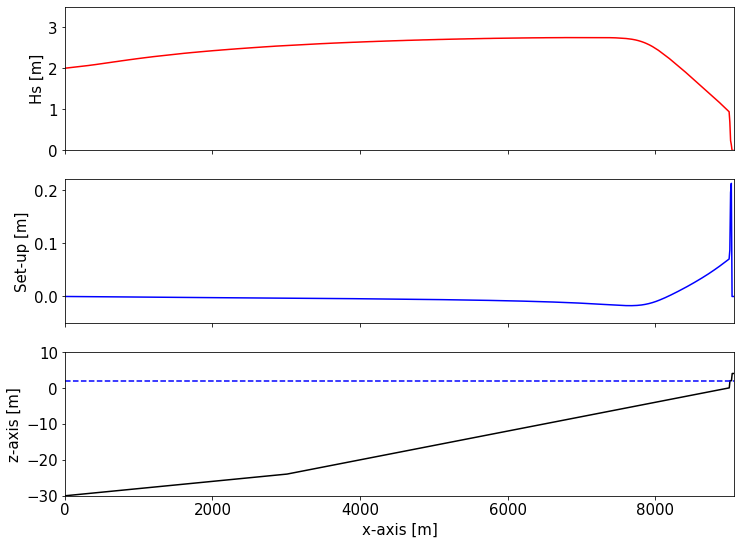

In [50]:
# Plotting wave height along the profile
axis_Hs = ([xp[0], xp[-1], 0, 3.5])
axis_Setup = ([xp[0], xp[-1], -0.05, 0.22])
axis_Profile = ([xp[0], xp[-1], -zp[0], 10])
fig, ax = plt.subplots(3,1, figsize = (12, 9), sharex=True)
ax[0].plot(xp_swn, Hs_swn, '-r')
ax[0].set_ylabel('Hs [m]')
ax[0].axis(axis_Hs)
ax[1].plot(xp_swn, Setup_swn, '-b')
ax[1].set_ylabel('Set-up [m]')
ax[1].axis(axis_Setup)
ax[2].plot(xp, -zp, 'k-')
ax[2].plot([xp[0], xp[-1]], [wlevel, wlevel], 'b--')
ax[2].set_xlabel('x-axis [m]')
ax[2].set_ylabel('z-axis [m]')
ax[2].axis(axis_Profile)
plt.show()

In [43]:
skip_freq = 9
freq_rows = 100
freq_dataP1 = pd.read_fwf(extract_point_name_1, sep=" ",
                   skiprows=skip_freq, header=None, nrows = freq_rows)
freq_dataP1.columns = ["Frequency"]
freq = freq_dataP1.Frequency

In [44]:
# loading Spectral data in spectral file
skip_spec = 122
spec_dataP1 = pd.read_fwf(extract_point_name_1, sep=" ",
                   skiprows=skip_spec, header=None)
spec_dataP1.columns = ["Spectral", "Col2", "Col3"]
spec_dataP1["Spectral"].replace({-99 : np.nan}, inplace=True)
specP1 = spec_dataP1.Spectral

spec_dataP2 = pd.read_fwf(extract_point_name_2, sep=" ",
                   skiprows=skip_spec, header=None)
spec_dataP2.columns = ["Spectral", "Col2", "Col3"]
spec_dataP2["Spectral"].replace({-99 : np.nan}, inplace=True)
specP2 = spec_dataP2.Spectral

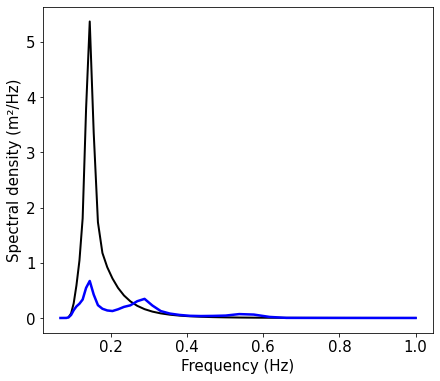

In [46]:
#print(dataP1, specP1)
plt.figure(figsize=(7, 6))
plt.plot(freq, specP1, '-', color='black', linewidth=2)
plt.plot(freq, specP2, '-', color='blue', linewidth=2.5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Spectral density (m\N{superscript two}/Hz)')
plt.show()